In [0]:
# Import the machine learning libraries.
import numpy as np
import keras as K
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [47]:
%%time
max_words = 20000

# Load the IMDB review sentiment dataset.
# Split the dataset into the training set and test subsets.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)
CPU times: user 4.17 s, sys: 250 ms, total: 4.42 s
Wall time: 4.43 s


In [48]:
max_review_length = 80
X_train = K.preprocessing.sequence.pad_sequences(X_train, truncating='pre', padding='pre', maxlen=max_review_length)
X_test = K.preprocessing.sequence.pad_sequences(X_test, truncating='pre', padding='pre', maxlen=max_review_length)

print(X_train.shape, X_test.shape)

(25000, 80) (25000, 80)


In [49]:
# Build the model.
embedding_length = 64
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_length, input_length=max_review_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


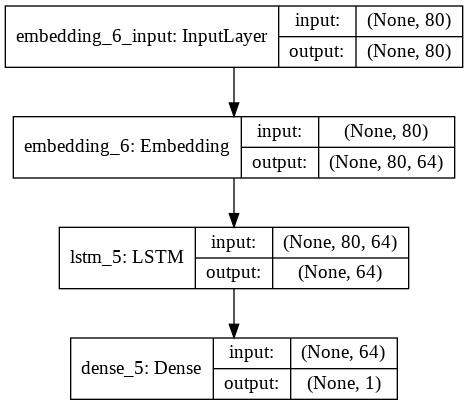

In [50]:
# Visualize.
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [51]:
# Train the model.
%%time
batch_size = 32
model.fit(X_train, y_train, batch_size = batch_size, epochs=10, validation_data = (X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 68s 3ms/step - loss: 0.4659 - accuracy: 0.7755 - val_loss: 0.3896 - val_accuracy: 0.8270
Epoch 2/10
25000/25000 [==============================] - 71s 3ms/step - loss: 0.3132 - accuracy: 0.8706 - val_loss: 0.3884 - val_accuracy: 0.8299
Epoch 3/10
25000/25000 [==============================] - 70s 3ms/step - loss: 0.2383 - accuracy: 0.9082 - val_loss: 0.4076 - val_accuracy: 0.8214
Epoch 4/10
25000/25000 [==============================] - 71s 3ms/step - loss: 0.1843 - accuracy: 0.9306 - val_loss: 0.4521 - val_accuracy: 0.8200
Epoch 5/10
25000/25000 [==============================] - 69s 3ms/step - loss: 0.1469 - accuracy: 0.9450 - val_loss: 0.5131 - val_accuracy: 0.8086
Epoch 6/10
25000/25000 [==============================] - 70s 3ms/step - loss: 0.1160 - accuracy: 0.9578 - val_loss: 0.5382 - val_accuracy: 0.8153
Epoch 7/10
25000/25000 [==============================] - 71s 3ms/st

In [52]:
# Evaluate the model.
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 10s 406us/step
Test score: 0.7973372465455532
Test accuracy: 0.8091599941253662


In [63]:
review = "The movie was a great waste of time."
print(f'New review: {review}')

New review: The movie was a great waste of time.


In [64]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=80)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = Positive) = {prediction}')

review = [2, 20, 16, 6, 87, 437, 7, 2]
Prediction (0 = Negative, 1 = Positive) = [[0.0173516]]


In [65]:
review = "It was a great movie"
print(f'New review: {review}')

New review: It was a great movie


In [66]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=80)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = Positive) = {prediction}')

review = [2, 16, 6, 87, 20]
Prediction (0 = Negative, 1 = Positive) = [[0.8872835]]
